# Function Used to Crop image based Maker

Definitions , constant and Markar

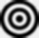

In [1]:
import cv2
import numpy as np
from src.logger import logger
from IPython.display import display
from PIL import Image
min_matching_threshold =  0.3
max_matching_variation = 0.41
apply_erode_subtract =  1
import myclass as my
marker = cv2.imread("savedmar.jpeg", cv2.IMREAD_GRAYSCALE)
display(Image.fromarray(marker))

Steps of Function of crop:
1-Quad image to four origin to fes

In [6]:
def apply_filter(image):
        image_eroded_sub = my.normalize_util(
            image
            if apply_erode_subtract
            else 
            (image - cv2.erode(image, kernel=np.ones((5, 5)), iterations=5))
        )
        # Quads on warped image
        quads = {}
        h1, w1 = image_eroded_sub.shape[:2]
        midh, midw = h1 // 3, w1 // 2
        origins = [[0, 0], [midw, 0], [0, midh], [midw, midh]]
        quads[0] = image_eroded_sub[0:midh, 0:midw]
        quads[1] = image_eroded_sub[0:midh, midw:w1]
        quads[2] = image_eroded_sub[midh:h1, 0:midw]
        quads[3] = image_eroded_sub[midh:h1, midw:w1]

        # Draw Quadlines
        image_eroded_sub[:, midw : midw + 2] = 255
        image_eroded_sub[midh : midh + 2, :] = 255
        # cv2.imshow("e+1",image_eroded_sub)

        best_scale, all_max_t =my.getBestMatch(image_eroded_sub)
        print(all_max_t)
        optimal_marker = my.resize_util_h(
            marker, u_height=int(marker.shape[0] * best_scale)
        )
        _h, w = optimal_marker.shape[:2]
        centres = []
        sum_t, max_t = 0, 0
        logger.info("Matching Marker:\t", end=" ")
        for k in range(0, 4):
            res = cv2.matchTemplate(quads[k], optimal_marker, cv2.TM_CCOEFF_NORMED)
            
            max_t = res.max()
            logger.info(f"Quarter{str(k + 1)}: {str(round(max_t, 3))} ", end="\t")
            if (
                max_t < min_matching_threshold
                or abs(all_max_t - max_t) >= max_matching_variation
            ):
                # Warning - code will stop in the middle. Keep Threshold low to
                # avoid.
                logger.error(
                    args["current_file"].name,
                    "\nError: No circle found in Quad",
                    k + 1,
                    "\n\t min_matching_threshold",
                    self.min_matching_threshold,
                    "\t max_matching_variation",
                    self.max_matching_variation,
                    "\t max_t",
                    max_t,
                    "\t all_max_t",
                    all_max_t,
                )
                if config.outputs.show_image_level >= 1:
                    MainOperations.show(
                        "no_pts_" + args["current_file"].name, image_eroded_sub, 0
                    )
                    MainOperations.show(
                        "res_Q" + str(k + 1) + " (" + str(max_t) + ")", res, 1
                    )
                return None

            pt = np.argwhere(res == max_t)[0]
            pt = [pt[1], pt[0]]
            pt[0] += origins[k][0]
            pt[1] += origins[k][1]
            print(">>",pt)
            image = cv2.rectangle(
                image, tuple(pt), (pt[0] + w, pt[1] + _h), (150, 150, 150), 2
            )
            # cv2.imshow(str(k + 5),image)
            # display:
            image_eroded_sub = cv2.rectangle(
                image_eroded_sub,
                tuple(pt),
                (pt[0] + w, pt[1] + _h),
                (50, 50, 50) if apply_erode_subtract else (155, 155, 155),
                4,
            )
            centres.append([pt[0] + w / 2, pt[1] + _h / 2])
            sum_t += max_t
        logger.info("Optimal Scale:", best_scale)
        display(Image.fromarray(image))
        image = my.four_point_transform(image, np.array(centres))
        return image




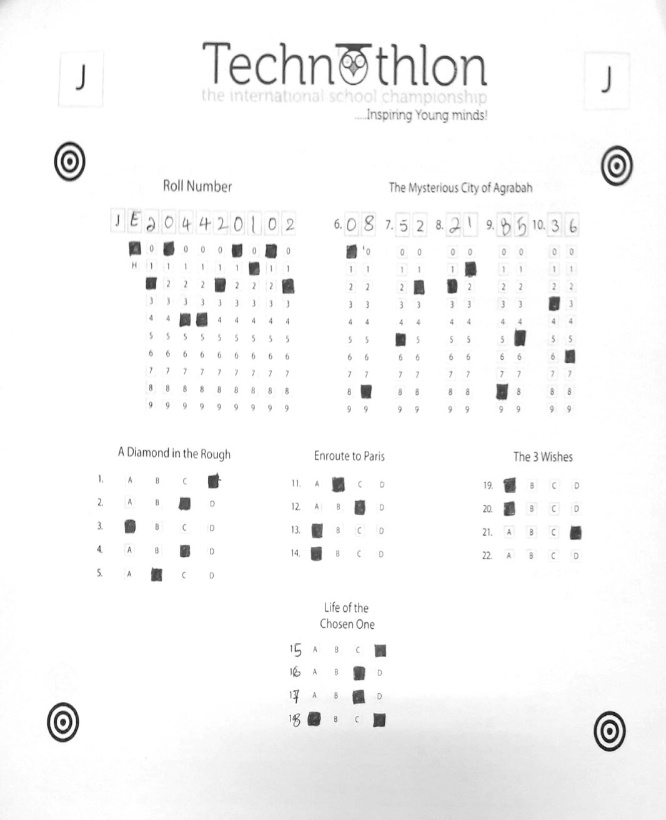

0.66365427


[12:23:04] INFO     Matching Marker:                                                                   ]8;id=583254;file:///home/jovyan/src/logger.py\logger.py]8;;\:]8;id=562408;file:///home/jovyan/src/logger.py#50\50]8;;\

           INFO     Quarter1: 0.664                                                                    ]8;id=58390;file:///home/jovyan/src/logger.py\logger.py]8;;\:]8;id=105196;file:///home/jovyan/src/logger.py#50\50]8;;\

>> [52, 144]


           INFO     Quarter2: 0.621                                                                    ]8;id=928918;file:///home/jovyan/src/logger.py\logger.py]8;;\:]8;id=613854;file:///home/jovyan/src/logger.py#50\50]8;;\

>> [599, 148]


           INFO     Quarter3: 0.661                                                                    ]8;id=41533;file:///home/jovyan/src/logger.py\logger.py]8;;\:]8;id=79363;file:///home/jovyan/src/logger.py#50\50]8;;\

>> [46, 705]


           INFO     Quarter4: 0.649                                                                    ]8;id=767361;file:///home/jovyan/src/logger.py\logger.py]8;;\:]8;id=368932;file:///home/jovyan/src/logger.py#50\50]8;;\

>> [592, 714]


           INFO     Optimal Scale: 0.94                                                                ]8;id=982905;file:///home/jovyan/src/logger.py\logger.py]8;;\:]8;id=556286;file:///home/jovyan/src/logger.py#50\50]8;;\

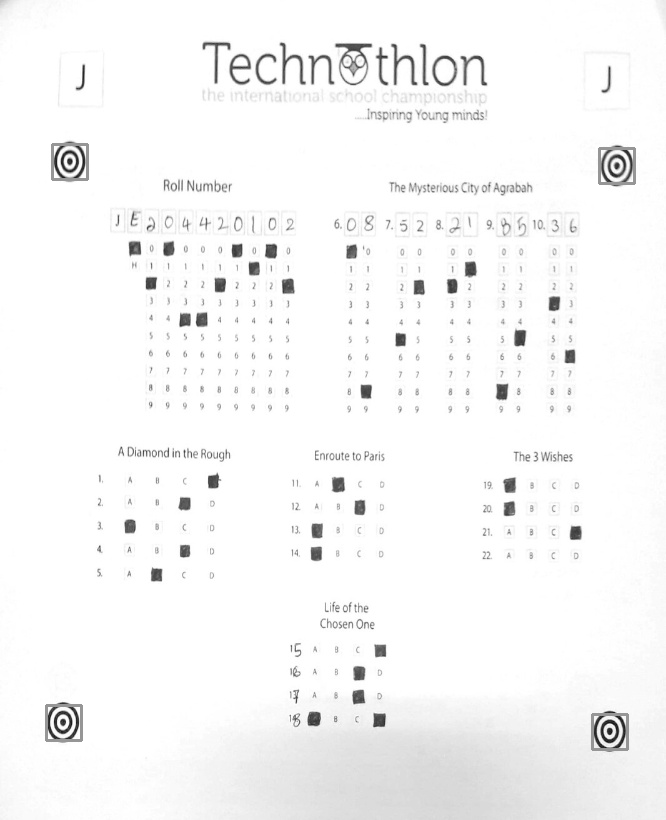

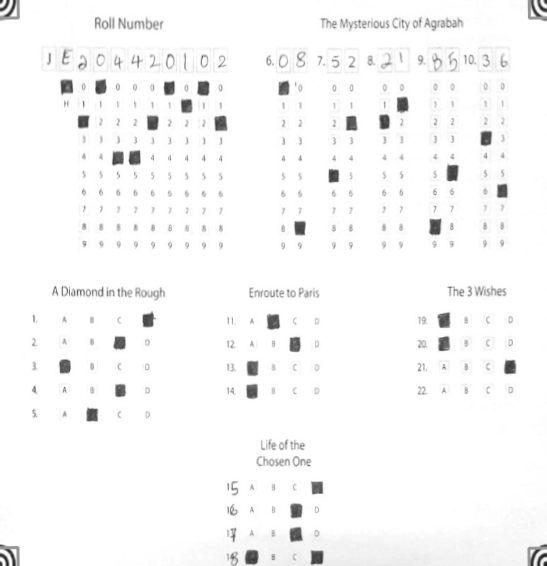

In [7]:
image = cv2.imread("savedimage.jpeg", cv2.IMREAD_GRAYSCALE)
display(Image.fromarray(image))
display(Image.fromarray(apply_filter( image)))